In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
mean_01=np.array([1,0.5])
cov_01=np.array([[1,0.1],[0.1,1.2]])

mean_02=np.array([4,5])
cov_02=np.array([[1.2,0.1],[0.1,1.3]])

dist_01=np.random.multivariate_normal(mean_01,cov_01,500)
dist_02=np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


C:\Users\Aditya bansal\AppData\Local\Temp\ipykernel_14220\2683093085.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


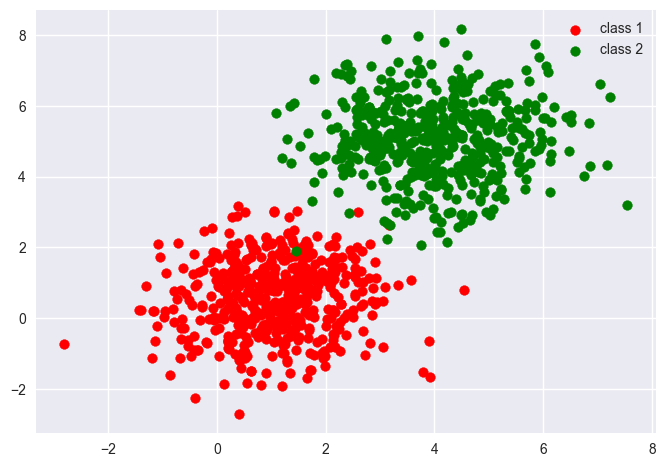

In [17]:
plt.style.use("seaborn")
plt.scatter(dist_01[:,0],dist_01[:,1],color='red',label='class 1')
plt.scatter(dist_02[:,0],dist_02[:,1],color='green',label='class 2')
plt.legend()
plt.show()

In [18]:
data=np.zeros((1000,3))
data[:500,:2]=dist_01
data[500:,:2]=dist_02
data[:500,2]=0
data[500:,2]=1
np.random.shuffle(data)
print(data)

[[1.55904811 1.56068552 0.        ]
 [2.8743047  0.8392386  0.        ]
 [1.77908045 6.75661997 1.        ]
 ...
 [1.74685191 0.13718204 0.        ]
 [3.7988272  3.47196769 1.        ]
 [4.66690889 3.50094918 1.        ]]


In [19]:
split=int(0.8*data.shape[0])
X_train=data[:split,:-1]
Y_train=data[:split,-1]
X_test=data[split:,:-1]
Y_test=data[split:,-1]

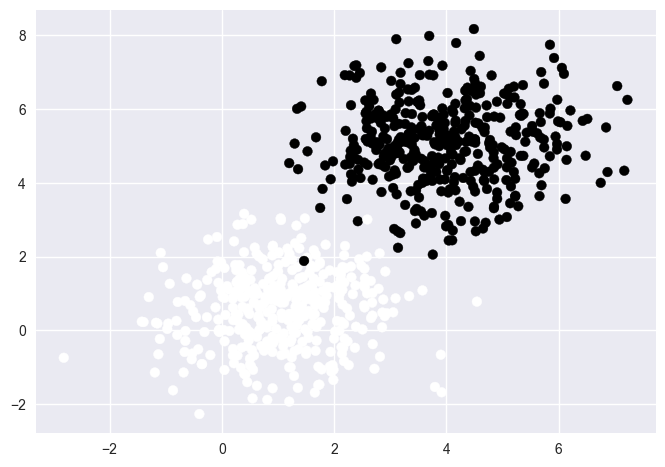

In [20]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.show()

In [23]:
X_mean=X_train.mean(axis=0)
X_std=X_train.std(axis=0)
X_train=(X_train-X_mean)/X_std
print(X_train)

[[-0.52653576 -0.5160023 ]
 [ 0.19779515 -0.80519341]
 [-0.40536075  1.56678161]
 ...
 [-1.10484354 -0.58981569]
 [-1.41043042 -1.15162514]
 [-0.15246816 -1.26055108]]


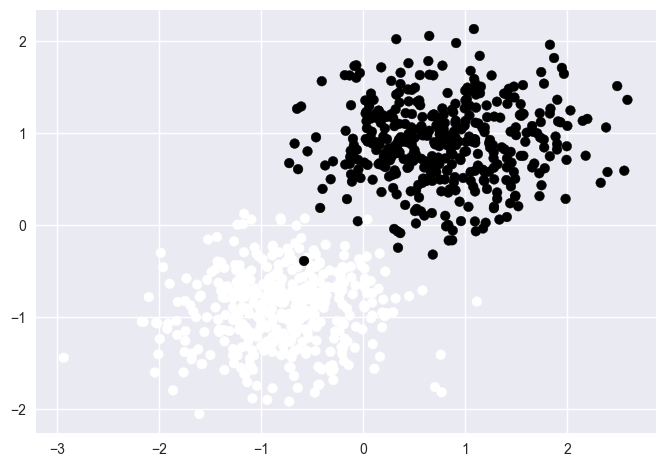

In [24]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.show()

In [25]:

X_test=(X_test-X_mean)/X_std
print(X_test)

[[-1.29308560e-01  1.59140044e+00]
 [ 5.47138266e-01  1.66518230e+00]
 [ 9.50789587e-01  2.01656375e-01]
 [ 2.28892635e+00  4.01533638e-01]
 [ 2.89096552e-01  1.03085442e+00]
 [-1.36620190e-01 -1.86156579e-02]
 [ 2.54130304e+00  4.86370003e+00]
 [ 5.53054963e+00  5.90600449e+00]
 [ 4.02335176e+00  3.90554930e+00]
 [ 1.42666745e+00  9.19534252e-01]
 [ 4.54862596e+00  4.18222029e+00]
 [ 2.14169963e+00  2.08811692e+00]
 [ 1.01167679e+00 -1.08641337e-01]
 [ 3.05809261e+00 -8.12167197e-01]
 [ 7.34711756e-01  1.25331695e+00]
 [ 6.54335768e-01  2.11008191e+00]
 [ 1.03407902e+00  1.20067211e+00]
 [ 1.83367893e-01  5.41849766e-01]
 [ 3.95580072e+00  6.05362625e+00]
 [ 3.11161419e+00  3.33307000e+00]
 [ 2.06701304e+00  2.03047919e+00]
 [ 9.89554876e-01  3.73719998e-01]
 [ 3.78438820e+00  5.42514846e+00]
 [ 1.83496071e-01  1.80038867e+00]
 [ 4.31419067e+00  4.96253193e+00]
 [ 5.56408513e+00  4.58383665e+00]
 [ 6.19105383e-01  1.71690102e+00]
 [-4.18557763e-01 -8.99998467e-01]
 [ 4.01816370e-01 -2

In [55]:
def sigmoid(Z):
    return(1/(1+(np.exp(-Z))))

def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))
def error(X,Y,theta):
    hx=hypothesis(X,theta)
    m=X.shape[0]
    e=-1*np.mean((Y*np.log(hx))+((1-Y)*np.log(1-hx)))
    return e
def gradien(X,Y,theta):
    hi=hypothesis(X,theta)
    grad=np.dot(X.T,(Y-hi))
    return grad/(X.shape[0])

def gradient_descent(X,Y,lr=0.1,max_=500):
    n=X.shape[1]
    theta=np.zeros((n,1))
    error_list=[]
    for i in range (max_):
        err=error(X,Y,theta)
        error_list.append(err)
        grad=gradien(X,Y,theta)
        theta=theta+lr*grad
        
    return(theta,error_list)

In [61]:
ones=np.ones((X_train.shape[0],1))
X_new_train=np.hstack((ones,X_train))
Y_train=Y_train.reshape((-1,1))

In [62]:
theta,error_list=gradient_descent(X_new_train,Y_train)

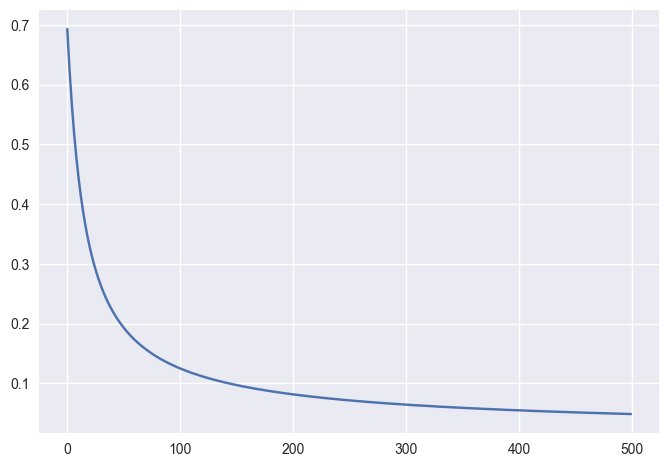

In [63]:
plt.plot(error_list)
plt.show()

In [65]:
print(theta)

[[0.09750268]
 [2.10506178]
 [2.99124135]]


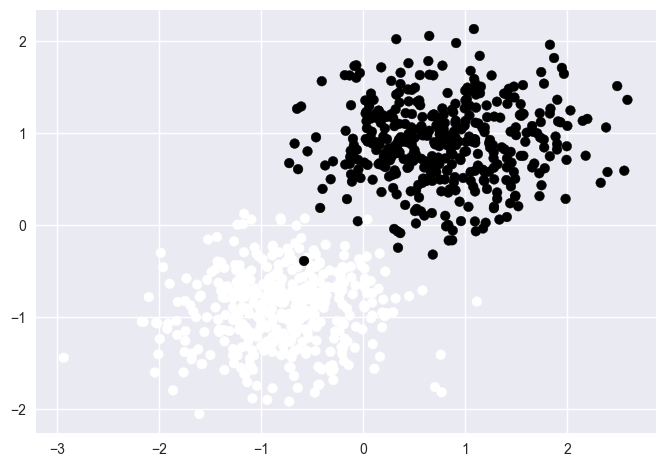

In [66]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.reshape((-1,)))

plt.show()

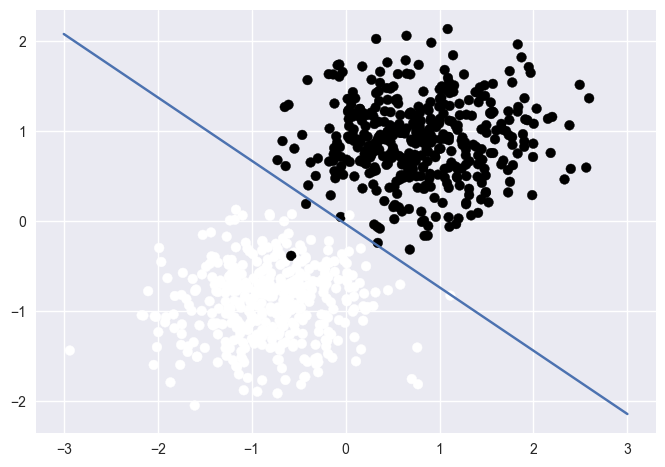

In [74]:
X1=np.arange(-3,4)
X2=-(theta[0]+theta[1]*X1)/theta[2]
plt.plot(X1,X2)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train.reshape((-1,)))

plt.show()

In [78]:
def predict(X,theta):
    hi=hypothesis(X,theta)
    out=np.zeros(hi.shape)
    out[hi>=0.5]=1
    out=out.astype('int')
    return out


In [81]:
ones=np.ones((X_test.shape[0],1))
X_new_test=np.hstack((ones,X_test))
Y_test=Y_test.reshape((-1,1))

In [90]:
XT_pred=predict(X_new_train,theta)
xT_pred=predict(X_new_test,theta)

In [91]:
def accuracy(actual,pred):
    actual=actual.astype('int')
    acc=np.sum(actual==pred)/actual.shape[0]
    return acc*100

In [92]:
accuracy(Y_train,XT_pred)

99.625

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
model=LogisticRegression()

In [96]:
model.fit(X_train,Y_train)

C:\Users\Aditya bansal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [100]:
theta_0=model.intercept_
theta_s=model.coef_
print(theta_0,theta_s)

[0.30098062] [[2.72303526 4.69356029]]


In [101]:
model.score(X_train,Y_train)

0.9975